In [4]:
%load_ext autoreload
%autoreload 2
import os
os.chdir("../..")

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import utils.constants as constants

In [6]:
df = pd.read_csv("resources/data/raw/lending_club_loan_two.csv")

In [8]:
df["issue_d"].apply(lambda d: d.split("-")[0]).drop_duplicates()

0     Jan
3     Nov
4     Apr
5     Sep
8     Oct
10    Jun
11    May
12    Dec
15    Jul
16    Feb
19    Mar
36    Aug
Name: issue_d, dtype: object

In [4]:
# Select relevant target values
df = df.loc[
    (df[constants.TARGET_COLUMN] == constants.FULLY_PAID_STATUS) |
    (df[constants.TARGET_COLUMN] == constants.CHARGED_OFF_STATUS)
]
df[constants.TARGET_COLUMN] = df[constants.TARGET_COLUMN].map({
    constants.FULLY_PAID_STATUS: 0,
    constants.CHARGED_OFF_STATUS: 1
})

In [5]:
df.shape

(396030, 27)

In [6]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

# Data Description

<AxesSubplot:>

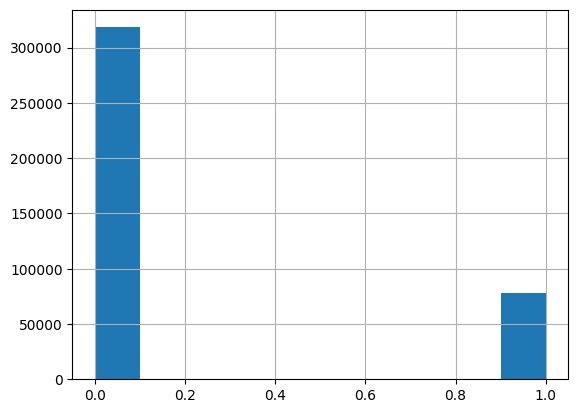

In [7]:
df[constants.TARGET_COLUMN].hist()

In [8]:
SKEWED_COLUMNS = []
COLUMNS_TO_STANDARDIZE = []
COLUMNS_TO_SCALE = []
NON_ETHICAL_COLUMNS = []
IMBALANCED_COLUMNS = []
COLUMNS_TO_ORDINAL_ENCODING = []
STANDARD_CAT_COLUMNS = []
REDUNDANT_COLUMNS = []
COLUMNS_TO_WOE_ENCODE = []
COLUMNS_TO_IMPUTE_MISSING_CATEGORY = []
COLUMNS_TO_DROP_OUTLIERS = []
DATE_COLUMNS_TO_SPLIT = []
COLUMNS_TO_CYCLICAL_ENCODING = []
COLUMNS_TO_BINARIZE = []
COLUMNS_TO_MICE_IMPUTE = []
COLUMNS_TO_IMPUTE_0 = []

In [9]:
def describe_num_column(col):
    print(f"{col.isna().sum() = }")
    print("----------------")
    print(col.describe())
    print(f"{col.skew() = }")
    print("----------------")
    print(col.drop_duplicates())
    print("----------------")
    col.hist()

def describe_cat_column(col, plot=True):
    print(f"{col.isna().sum() = }")
    print("----------------")
    print(col.describe())
    print("----------------")
    print(col.drop_duplicates())
    print("----------------")
    print(f"{col.nunique()=}")
    print("----------------")
    if plot:
        col.hist()

### `loan_amnt`

col.isna().sum() = 0
----------------
count    396030.000000
mean      14113.888089
std        8357.441341
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64
col.skew() = 0.777285467097746
----------------
0         10000.0
1          8000.0
2         15600.0
3          7200.0
4         24375.0
           ...   
306070    39200.0
307646    38750.0
311095    36275.0
345526    36475.0
385292      725.0
Name: loan_amnt, Length: 1397, dtype: float64
----------------


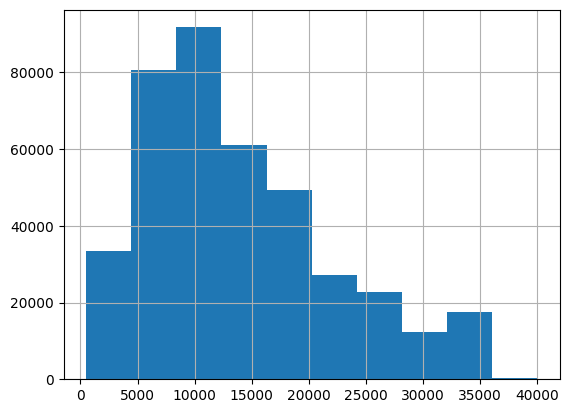

In [10]:
describe_num_column(df["loan_amnt"])

In [11]:
SKEWED_COLUMNS.append("loan_amnt")
COLUMNS_TO_STANDARDIZE.append("loan_amnt")

### `term`

col.isna().sum() = 0
----------------
count         396030
unique             2
top        36 months
freq          302005
Name: term, dtype: object
----------------
0     36 months
4     60 months
Name: term, dtype: object
----------------
col.nunique()=2
----------------


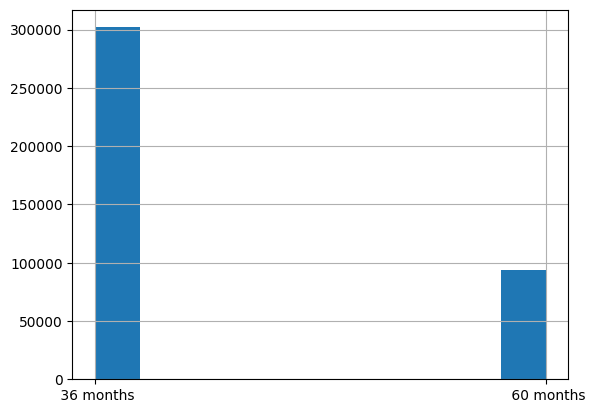

In [12]:
describe_cat_column(df["term"])

In [13]:
COLUMNS_TO_ORDINAL_ENCODING.append("term")
COLUMNS_TO_SCALE.append("term")

### `int_rate`

col.isna().sum() = 0
----------------
count    396030.000000
mean         13.639400
std           4.472157
min           5.320000
25%          10.490000
50%          13.330000
75%          16.490000
max          30.990000
Name: int_rate, dtype: float64
col.skew() = 0.4206694719582165
----------------
0         11.44
1         11.99
2         10.49
3          6.49
4         17.27
          ...  
310314    24.40
360899    22.64
367551    17.54
371228    17.44
383900    15.07
Name: int_rate, Length: 566, dtype: float64
----------------


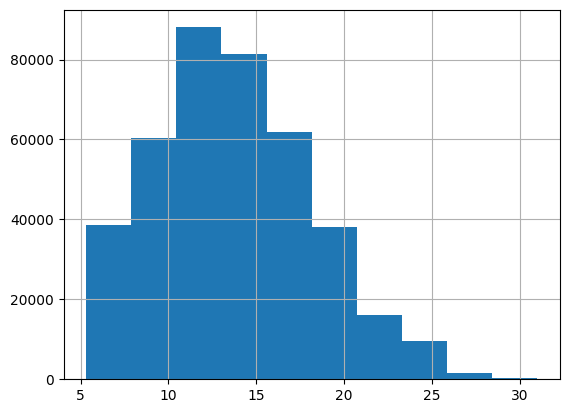

In [14]:
describe_num_column(df["int_rate"])

In [15]:
SKEWED_COLUMNS.append("loan_amnt")
COLUMNS_TO_STANDARDIZE.append("loan_amnt")

### `installment`

col.isna().sum() = 0
----------------
count    396030.000000
mean        431.849698
std         250.727790
min          16.080000
25%         250.330000
50%         375.430000
75%         567.300000
max        1533.810000
Name: installment, dtype: float64
col.skew() = 0.983598160890438
----------------
0         329.48
1         265.68
2         506.97
3         220.65
4         609.33
           ...  
395918    298.10
395921    346.35
395961    343.14
395977    118.13
395978    572.44
Name: installment, Length: 55706, dtype: float64
----------------


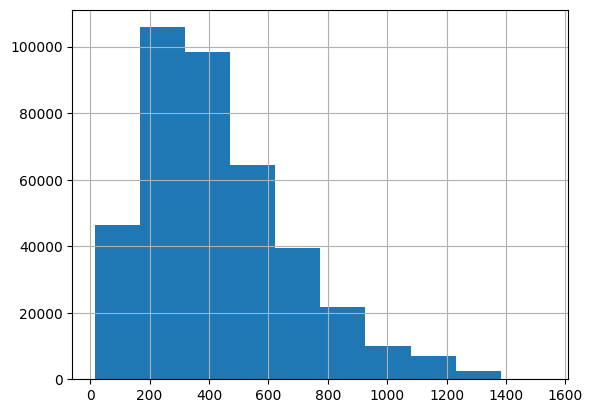

In [16]:
describe_num_column(df["installment"])

In [17]:
SKEWED_COLUMNS.append("loan_amnt")
COLUMNS_TO_STANDARDIZE.append("loan_amnt")

### `grade` & `sub_grade`

In [18]:
df[["grade", "sub_grade"]].sort_values("sub_grade").drop_duplicates()

,grade,sub_grade
58544,A,A1
235252,A,A2
387215,A,A3
186891,A,A4
319816,A,A5
115101,B,B1
284405,B,B2
200291,B,B3
380099,B,B4
386270,B,B5


`sub_grade` is variable dependent on `grade`, so for not keeping high cardinality categorical variables I'll drop `sub_grade` column

In [19]:
REDUNDANT_COLUMNS.append("sub_grade")
COLUMNS_TO_ORDINAL_ENCODING.append("grade")
COLUMNS_TO_SCALE.append("grade")

### `emp_title`

In [20]:
describe_cat_column(df["emp_title"], plot=False)

col.isna().sum() = 22927
----------------
count      373103
unique     173105
top       Teacher
freq         4389
Name: emp_title, dtype: object
----------------
0                         Marketing
1                   Credit analyst 
2                      Statistician
3                   Client Advocate
4           Destiny Management Inc.
                    ...            
396020         Retirement Counselor
396022    Data Center Specialist II
396024      Michael's Arts & Crafts
396025             licensed bankere
396028         Gracon Services, Inc
Name: emp_title, Length: 173106, dtype: object
----------------
col.nunique()=173105
----------------


In [21]:
COLUMNS_TO_IMPUTE_MISSING_CATEGORY.append("emp_title")
COLUMNS_TO_WOE_ENCODE.append("emp_title")

### `emp_length`

col.isna().sum() = 18301
----------------
count        377729
unique           11
top       10+ years
freq         126041
Name: emp_length, dtype: object
----------------
0     10+ years
1       4 years
2      < 1 year
3       6 years
4       9 years
6       2 years
9       3 years
11      8 years
12      7 years
22      5 years
32       1 year
35          NaN
Name: emp_length, dtype: object
----------------
col.nunique()=11
----------------


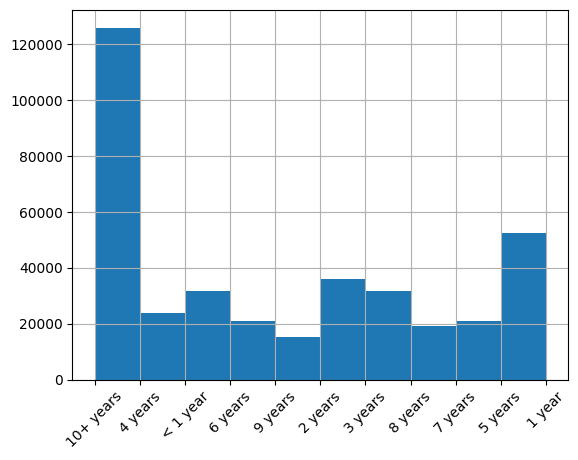

In [22]:
plt.xticks(rotation=45)
describe_cat_column(df["emp_length"])

In [23]:
COLUMNS_TO_MICE_IMPUTE.append("emp_length")
COLUMNS_TO_ORDINAL_ENCODING.append("emp_length")
COLUMNS_TO_SCALE.append("emp_length")

### `home_ownership`

col.isna().sum() = 0
----------------
count       396030
unique           6
top       MORTGAGE
freq        198348
Name: home_ownership, dtype: object
----------------
0            RENT
1        MORTGAGE
12            OWN
8691        OTHER
9949         NONE
16970         ANY
Name: home_ownership, dtype: object
----------------
col.nunique()=6
----------------


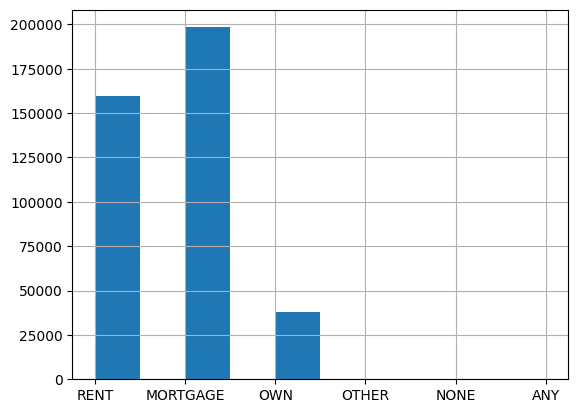

In [24]:
describe_cat_column(df["home_ownership"])

We may need to merge "None", "Any", "Other", "Own" into one category

In [25]:
STANDARD_CAT_COLUMNS.append("home_ownership")

### `annual_inc`

col.isna().sum() = 0
----------------
count    3.960300e+05
mean     7.420318e+04
std      6.163762e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.400000e+04
75%      9.000000e+04
max      8.706582e+06
Name: annual_inc, dtype: float64
col.skew() = 41.042724746560665
----------------
0         117000.00
1          65000.00
2          43057.00
3          54000.00
4          55000.00
            ...    
395941     14772.00
395963     32964.00
395973     36111.00
395983     47212.00
395999     31789.88
Name: annual_inc, Length: 27197, dtype: float64
----------------


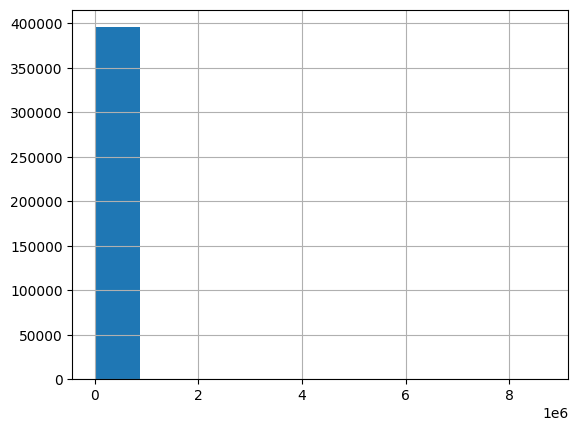

In [26]:
describe_num_column(df["annual_inc"])

In [27]:
COLUMNS_TO_DROP_OUTLIERS.append("annual_inc")
SKEWED_COLUMNS.append("annual_inc")
COLUMNS_TO_STANDARDIZE.append("annual_inc")

###  `verification_status`

col.isna().sum() = 0
----------------
count       396030
unique           3
top       Verified
freq        139563
Name: verification_status, dtype: object
----------------
0       Not Verified
2    Source Verified
4           Verified
Name: verification_status, dtype: object
----------------
col.nunique()=3
----------------


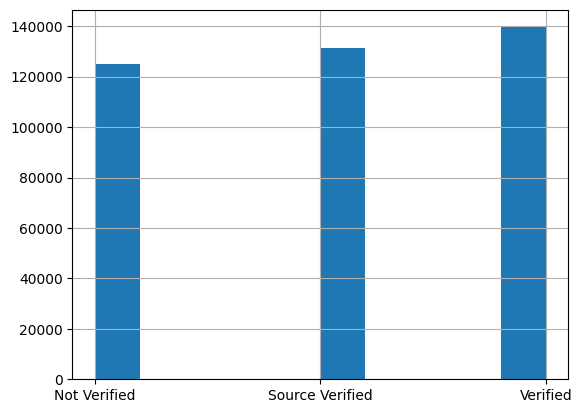

In [28]:
describe_cat_column(df["verification_status"])

In [29]:
STANDARD_CAT_COLUMNS.append("verification_status")

### `issue_d`

col.isna().sum() = 0
----------------
count       396030
unique         115
top       Oct-2014
freq         14846
Name: issue_d, dtype: object
----------------
0        Jan-2015
3        Nov-2014
4        Apr-2013
5        Sep-2015
7        Sep-2012
           ...   
12778    Jun-2008
13061    Jul-2008
17078    Jun-2007
27187    Nov-2007
27810    Jul-2007
Name: issue_d, Length: 115, dtype: object
----------------
col.nunique()=115
----------------


2022-11-21 00:40:00,326 matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-11-21 00:40:00,371 matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<AxesSubplot:>

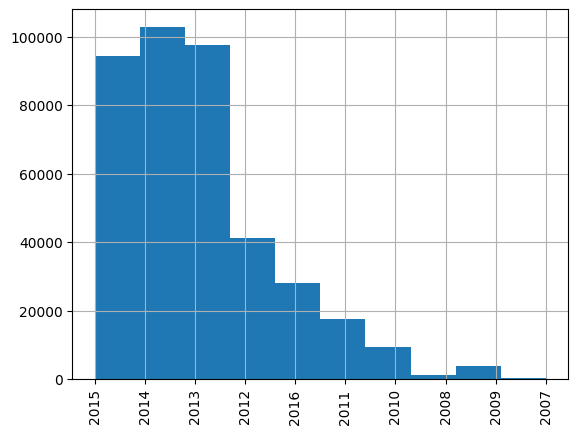

In [30]:
plt.xticks(rotation=90)
describe_cat_column(df["issue_d"], plot=False)
df["issue_d_year"] = df["issue_d"].apply(lambda d: d.split("-")[1])
df["issue_d_year"].hist()

In [31]:
DATE_COLUMNS_TO_SPLIT.append("issue_d")
COLUMNS_TO_SCALE.append("issue_d_year")
COLUMNS_TO_CYCLICAL_ENCODING.append("issue_d_month")

### `purpose`

col.isna().sum() = 0
----------------
count                 396030
unique                    14
top       debt_consolidation
freq                  234507
Name: purpose, dtype: object
----------------
0                 vacation
1       debt_consolidation
2              credit_card
6         home_improvement
14          small_business
15          major_purchase
22                   other
25                 medical
78                 wedding
83                     car
84                  moving
86                   house
584            educational
2417      renewable_energy
Name: purpose, dtype: object
----------------
col.nunique()=14
----------------


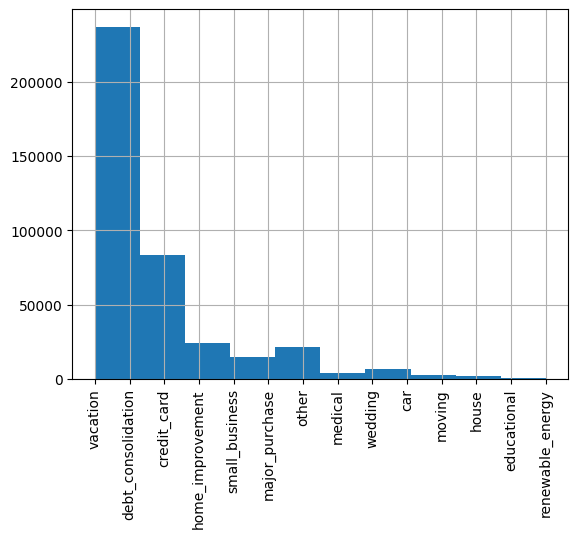

In [32]:
plt.xticks(rotation=90)
describe_cat_column(df["purpose"])

In [33]:
STANDARD_CAT_COLUMNS.append("purpose")

### `title`

In [34]:
describe_cat_column(df["title"], plot=False)

col.isna().sum() = 1755
----------------
count                 394275
unique                 48817
top       Debt consolidation
freq                  152472
Name: title, dtype: object
----------------
0                                      Vacation
1                            Debt consolidation
2                       Credit card refinancing
4                         Credit Card Refinance
6                              Home improvement
                          ...                  
396016              Outboard Motor Repower Loan
396021    2011 Insurance and Debt Consolidation
396024                           Credit buster 
396028                            Loanforpayoff
396029                        Toxic Debt Payoff
Name: title, Length: 48818, dtype: object
----------------
col.nunique()=48817
----------------


As for now let's drop this, but in future we may need to reintroduce this column

### `address`

I will drop this column since I don't want model to predict default probability based on somebody's address

In [12]:
df["term"].drop_duplicates().values

array([' 36 months', ' 60 months'], dtype=object)

In [35]:
NON_ETHICAL_COLUMNS.append("zip_code")
NON_ETHICAL_COLUMNS.append("addr_state")

### `dti`

col.isna().sum() = 0
----------------
count    396030.000000
mean         17.379514
std          18.019092
min           0.000000
25%          11.280000
50%          16.910000
75%          22.980000
max        9999.000000
Name: dti, dtype: float64
col.skew() = 431.05122535490415
----------------
0         26.24
1         22.05
2         12.79
3          2.60
4         33.95
          ...  
392332    40.71
392526    42.49
392548    40.56
393545    47.09
395810    55.53
Name: dti, Length: 4262, dtype: float64
----------------


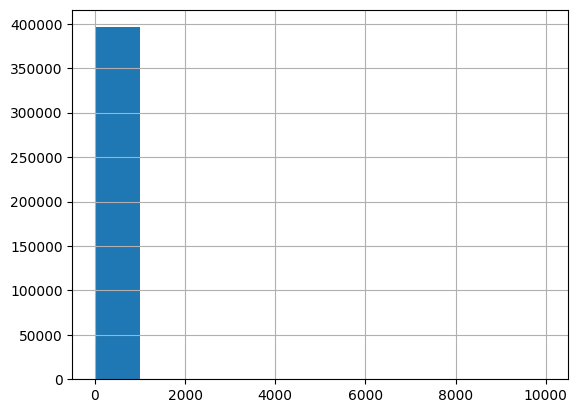

In [36]:
describe_num_column(df["dti"])

In [37]:
COLUMNS_TO_DROP_OUTLIERS.append("dti")
SKEWED_COLUMNS.append("dti")
COLUMNS_TO_STANDARDIZE.append("dti")

### `earliest_cr_line`

col.isna().sum() = 0
----------------
count       396030
unique         684
top       Oct-2000
freq          3017
Name: earliest_cr_line, dtype: object
----------------
0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
351793    Jan-1948
358946    Aug-1963
360281    Oct-1961
370508    Aug-1962
387120    Aug-1959
Name: earliest_cr_line, Length: 684, dtype: object
----------------
col.nunique()=684
----------------


2022-11-21 00:40:02,631 matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-11-21 00:40:02,679 matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<AxesSubplot:>

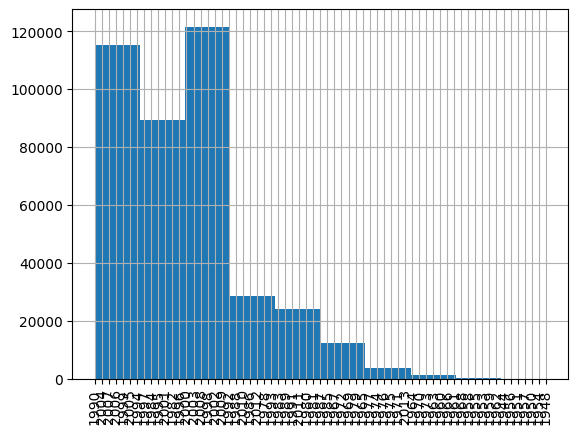

In [38]:
plt.xticks(rotation=90)
describe_cat_column(df["earliest_cr_line"], plot=False)
df["earliest_cr_line_year"] = df["earliest_cr_line"].apply(lambda d: d.split("-")[1])
df["earliest_cr_line_year"].hist()

In [39]:
DATE_COLUMNS_TO_SPLIT.append("earliest_cr_line")
COLUMNS_TO_SCALE.append("earliest_cr_line_year")
COLUMNS_TO_CYCLICAL_ENCODING.append("earliest_cr_line_month")

### `open_acc`

col.isna().sum() = 0
----------------
count    396030.000000
mean         11.311153
std           5.137649
min           0.000000
25%           8.000000
50%          10.000000
75%          14.000000
max          90.000000
Name: open_acc, dtype: float64
----------------
0         16.0
1         17.0
2         13.0
3          6.0
5          8.0
          ... 
103257    45.0
107918    90.0
127450    56.0
187623    55.0
273075    76.0
Name: open_acc, Length: 61, dtype: float64
----------------
col.nunique()=61
----------------


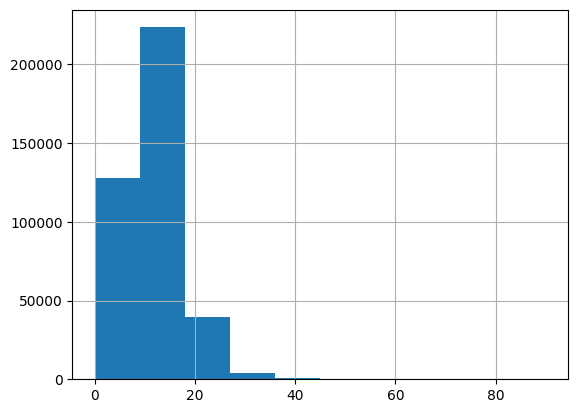

In [40]:
describe_cat_column(df["open_acc"])

In [41]:
COLUMNS_TO_DROP_OUTLIERS.append("open_acc")
SKEWED_COLUMNS.append("open_acc")
COLUMNS_TO_STANDARDIZE.append("open_acc")

### `pub_rec`

col.isna().sum() = 0
----------------
count    396030.000000
mean          0.178191
std           0.530671
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          86.000000
Name: pub_rec, dtype: float64
col.skew() = 16.576564199464457
----------------
0          0.0
10         1.0
122        2.0
134        3.0
730        4.0
1046       6.0
1200       5.0
3561       8.0
5457       9.0
13190     10.0
16535     11.0
16792      7.0
58202     19.0
90433     13.0
127417    40.0
150704    17.0
218818    86.0
220119    12.0
252783    24.0
356214    15.0
Name: pub_rec, dtype: float64
----------------


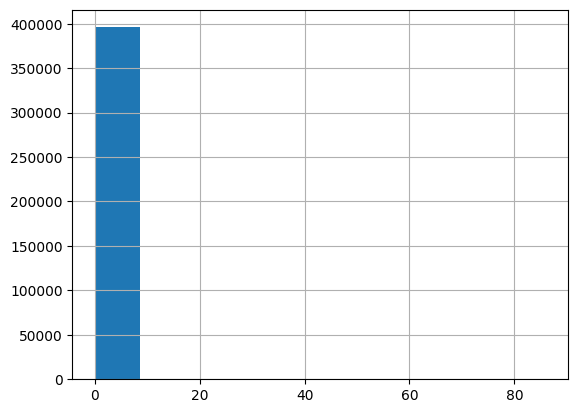

In [42]:
describe_num_column(df["pub_rec"])

In [43]:
COLUMNS_TO_BINARIZE.append("pub_rec")

### `revol_bal`

col.isna().sum() = 0
----------------
count    3.960300e+05
mean     1.584454e+04
std      2.059184e+04
min      0.000000e+00
25%      6.025000e+03
50%      1.118100e+04
75%      1.962000e+04
max      1.743266e+06
Name: revol_bal, dtype: float64
col.skew() = 11.727515124126919
----------------
0          36369.0
1          20131.0
2          11987.0
3           5472.0
4          24584.0
            ...   
395904     88084.0
395907     49384.0
395913     34531.0
395936    151912.0
395940     29244.0
Name: revol_bal, Length: 55622, dtype: float64
----------------


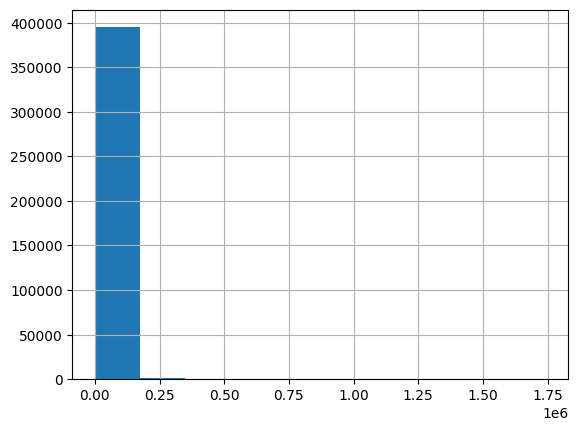

In [44]:
describe_num_column(df["revol_bal"])

In [45]:
COLUMNS_TO_DROP_OUTLIERS.append("open_acc")
SKEWED_COLUMNS.append("open_acc")
COLUMNS_TO_STANDARDIZE.append("open_acc")

### `revol_util`

col.isna().sum() = 276
----------------
count    395754.000000
mean         53.791749
std          24.452193
min           0.000000
25%          35.800000
50%          54.800000
75%          72.900000
max         892.300000
Name: revol_util, dtype: float64
col.skew() = -0.07177802032853098
----------------
0          41.80
1          53.30
2          92.20
3          21.50
4          69.80
           ...  
377419    119.20
382526     62.31
387396     56.26
390909    111.40
391865    128.10
Name: revol_util, Length: 1227, dtype: float64
----------------


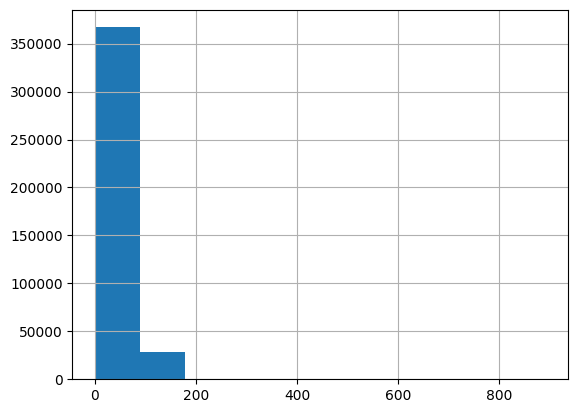

In [46]:
describe_num_column(df["revol_util"])

In [47]:
COLUMNS_TO_MICE_IMPUTE.append("revol_util")
COLUMNS_TO_DROP_OUTLIERS.append("open_acc")
SKEWED_COLUMNS.append("open_acc")
COLUMNS_TO_STANDARDIZE.append("open_acc")

### `total_acc`

col.isna().sum() = 0
----------------
count    396030.000000
mean         25.414744
std          11.886991
min           2.000000
25%          17.000000
50%          24.000000
75%          32.000000
max         151.000000
Name: total_acc, dtype: float64
col.skew() = 0.8643276369429
----------------
0          25.0
1          27.0
2          26.0
3          13.0
4          43.0
          ...  
167972     96.0
209490     98.0
223233    100.0
322243    116.0
359804    103.0
Name: total_acc, Length: 118, dtype: float64
----------------


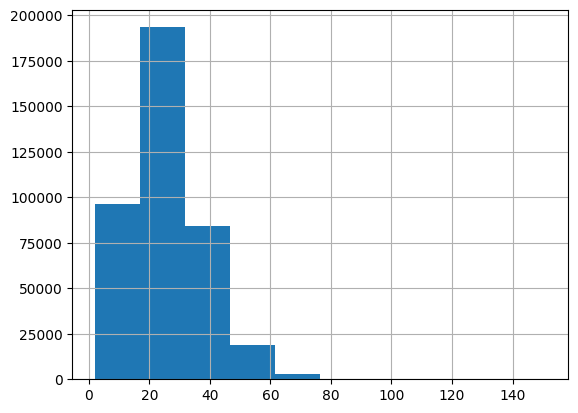

In [48]:
describe_num_column(df["total_acc"])

In [49]:
COLUMNS_TO_DROP_OUTLIERS.append("open_acc")
SKEWED_COLUMNS.append("open_acc")
COLUMNS_TO_STANDARDIZE.append("open_acc")

### `initial_list_status`

col.isna().sum() = 0
----------------
count     396030
unique         2
top            f
freq      238066
Name: initial_list_status, dtype: object
----------------
0    w
1    f
Name: initial_list_status, dtype: object
----------------
col.nunique()=2
----------------


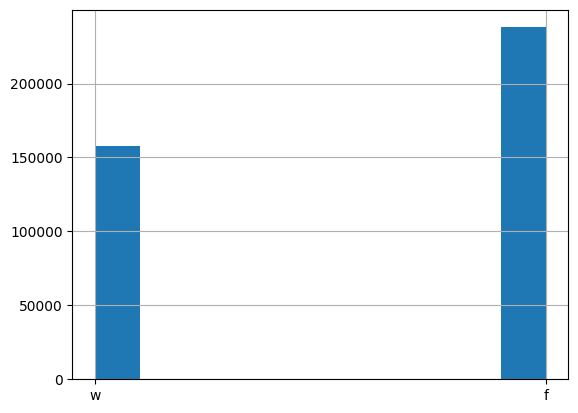

In [50]:
describe_cat_column(df["initial_list_status"])

In [51]:
STANDARD_CAT_COLUMNS.append("initial_list_status")

### `application_type`

col.isna().sum() = 0
----------------
count         396030
unique             3
top       INDIVIDUAL
freq          395319
Name: application_type, dtype: object
----------------
0      INDIVIDUAL
12          JOINT
885    DIRECT_PAY
Name: application_type, dtype: object
----------------
col.nunique()=3
----------------


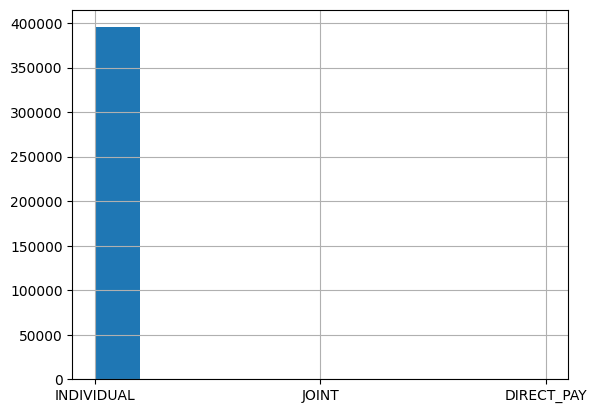

In [52]:
describe_cat_column(df["application_type"])

In [53]:
IMBALANCED_COLUMNS.append("application_type")

### `mort_acc`

col.isna().sum() = 37795
----------------
count    358235.000000
mean          1.813991
std           2.147930
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          34.000000
Name: mort_acc, dtype: float64
col.skew() = 1.6001324380874855
----------------
0          0.0
1          3.0
4          1.0
5          4.0
13         2.0
14         6.0
17         5.0
22         NaN
40        10.0
128        7.0
235       12.0
302       11.0
354        8.0
381        9.0
1509      13.0
1758      14.0
9463      22.0
10208     34.0
10561     15.0
13522     25.0
13628     19.0
24239     16.0
32479     17.0
33814     32.0
56297     18.0
61401     24.0
61512     21.0
88961     20.0
132453    31.0
162303    28.0
181243    30.0
209795    23.0
210407    26.0
322138    27.0
Name: mort_acc, dtype: float64
----------------


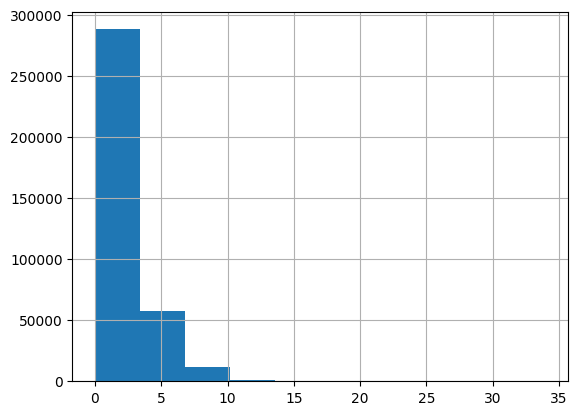

In [54]:
describe_num_column(df["mort_acc"])

In [55]:
COLUMNS_TO_MICE_IMPUTE.append("mort_acc")
COLUMNS_TO_DROP_OUTLIERS.append("mort_acc")
COLUMNS_TO_STANDARDIZE.append("mort_acc")

### `pub_rec_bankruptcies`

col.isna().sum() = 535
----------------
count    395495.000000
mean          0.121648
std           0.356174
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: pub_rec_bankruptcies, dtype: float64
col.skew() = 3.4234403681961583
----------------
0         0.0
10        1.0
376       2.0
803       3.0
912       NaN
1224      4.0
4679      5.0
31147     6.0
72502     7.0
226080    8.0
Name: pub_rec_bankruptcies, dtype: float64
----------------


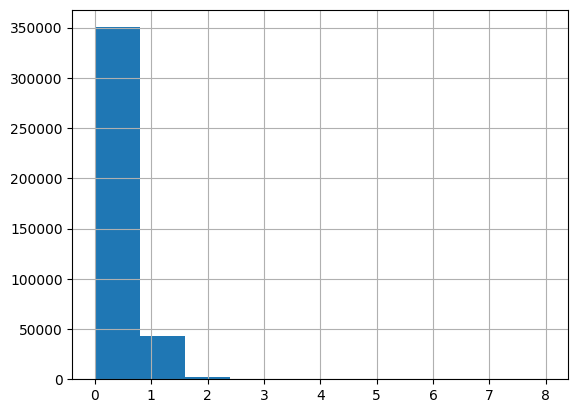

In [56]:
describe_num_column(df["pub_rec_bankruptcies"])

In [57]:
COLUMNS_TO_IMPUTE_0.append("pub_rec_bankruptcies")
COLUMNS_TO_BINARIZE.append("pub_rec_bankruptcies")

## Summary

In [58]:
print(f"{SKEWED_COLUMNS = }")
print(f"{COLUMNS_TO_STANDARDIZE = }")
print(f"{COLUMNS_TO_SCALE = }")
print(f"{NON_ETHICAL_COLUMNS = }")
print(f"{IMBALANCED_COLUMNS = }")
print(f"{COLUMNS_TO_ORDINAL_ENCODING = }")
print(f"{STANDARD_CAT_COLUMNS = }")
print(f"{REDUNDANT_COLUMNS = }")
print(f"{COLUMNS_TO_WOE_ENCODE = }")
print(f"{COLUMNS_TO_IMPUTE_MISSING_CATEGORY = }")
print(f"{COLUMNS_TO_DROP_OUTLIERS = }")
print(f"{DATE_COLUMNS_TO_SPLIT = }")
print(f"{COLUMNS_TO_CYCLICAL_ENCODING = }")
print(f"{COLUMNS_TO_BINARIZE = }")
print(f"{COLUMNS_TO_MICE_IMPUTE = }")
print(f"{COLUMNS_TO_IMPUTE_0 = }")

SKEWED_COLUMNS = ['loan_amnt', 'loan_amnt', 'loan_amnt', 'annual_inc', 'dti', 'open_acc', 'open_acc', 'open_acc', 'open_acc']
COLUMNS_TO_STANDARDIZE = ['loan_amnt', 'loan_amnt', 'loan_amnt', 'annual_inc', 'dti', 'open_acc', 'open_acc', 'open_acc', 'open_acc', 'mort_acc']
COLUMNS_TO_SCALE = ['term', 'grade', 'emp_length', 'issue_d_year', 'earliest_cr_line_year']
NON_ETHICAL_COLUMNS = ['zip_code', 'addr_state']
IMBALANCED_COLUMNS = ['application_type']
COLUMNS_TO_ORDINAL_ENCODING = ['term', 'grade', 'emp_length', 'initial_list_status']
STANDARD_CAT_COLUMNS = ['home_ownership', 'verification_status', 'purpose']
REDUNDANT_COLUMNS = ['sub_grade']
COLUMNS_TO_WOE_ENCODE = ['emp_title']
COLUMNS_TO_IMPUTE_MISSING_CATEGORY = ['emp_title']
COLUMNS_TO_DROP_OUTLIERS = ['annual_inc', 'dti', 'open_acc', 'open_acc', 'open_acc', 'open_acc', 'mort_acc']
DATE_COLUMNS_TO_SPLIT = ['issue_d', 'earliest_cr_line']
COLUMNS_TO_CYCLICAL_ENCODING = ['issue_d_month', 'earliest_cr_line_month']
COLUMNS_TO_BINARIZE =

# Missing Values

In [59]:
df.isna().any(axis=0)

loan_amnt                False
term                     False
int_rate                 False
installment              False
grade                    False
sub_grade                False
emp_title                 True
emp_length                True
home_ownership           False
annual_inc               False
verification_status      False
issue_d                  False
loan_status              False
purpose                  False
title                     True
dti                      False
earliest_cr_line         False
open_acc                 False
pub_rec                  False
revol_bal                False
revol_util                True
total_acc                False
initial_list_status      False
application_type         False
mort_acc                  True
pub_rec_bankruptcies      True
address                  False
issue_d_year             False
earliest_cr_line_year    False
dtype: bool

## Correlations

<AxesSubplot:>

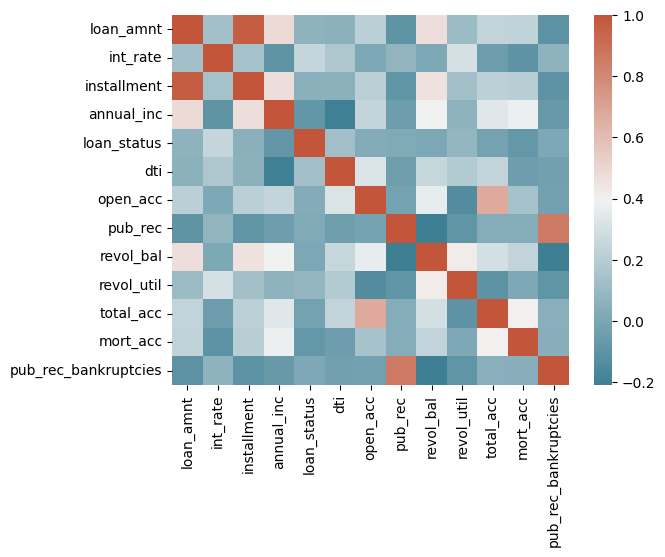

In [60]:
sns.heatmap(df.corr(method="spearman"), cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [61]:
COLUMNS_HIGHLY_CORRELATED_TO_DROP=["installment"]